# Построение модели многоклассовой классификации для датасета Iris

##Описание датасета

Iris Dataset был собран британским биологом и статистиком Рональдом Фишером в 1936 году. Этот набор включает 150 образцов цветка ириса, принадлежащих к **трем** различным видам: Iris setosa Iris versicolor и Iris virginica Для каждого образца измерены **четыре** характеристики:

Длина чашелистика (sepal length) в см.\
Ширина чашелистика (sepal width) в см.\
Длина лепестка (petal length) в см.\
Ширина лепестка (petal width) в см.

Задача классификации — включает в себя три четко определенных класса, один из которых линейно отделим, а два других — нет.\
Данный датасет не содержит пропущенных значений, что упрощает начальный анализ

##Код

In [54]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, log_loss
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [55]:
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Поэтапное обучение с помощью warm_start для отслеживания динамики потерь
model = MLPClassifier(hidden_layer_sizes=[5, 5], max_iter=1, warm_start=True, random_state=42)
num_iterations = 1500
test_losses = []

In [58]:
# Обучаем модель:
for _ in range(num_iterations):
    model.fit(X_train, y_train)
    test_pred_proba = model.predict_proba(X_test)
    test_loss = log_loss(y_test, test_pred_proba)
    test_losses.append(test_loss)

In [59]:
# Example prediction for a new sample (first test sample)
new_sample = X_test[0].reshape(1, -1)
prediction = model.predict(new_sample)
print(f"Predicted class for new sample: {iris.target_names[prediction[0]]}")

Predicted class for new sample: versicolor


### Вычисление метрик модели:

In [60]:
# Прогоняем тестовую выборку через модель и сохраняем ответы
y_pred_lr = model.predict(X_test)

Метрики `accuracy`, `precision`, `recall`, `F1`:

In [61]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 93.33%


In [62]:
# Calculate precision
precision = precision_score(y_test, y_pred_lr, average='macro')
print(f"Precision: {precision  * 100:.2f}%")

Precision: 93.27%


In [63]:
# Calculate recall
recall = recall_score(y_test, y_pred_lr, average='macro')
print(f"Recall: {recall * 100:.2f}%")

Recall: 93.27%


In [64]:
# Calculate F1
f1 = f1_score(y_test, y_pred_lr, average='macro')
print(f"F1: {f1 * 100:.2f}%")

F1: 93.27%


Матрица ошибок:

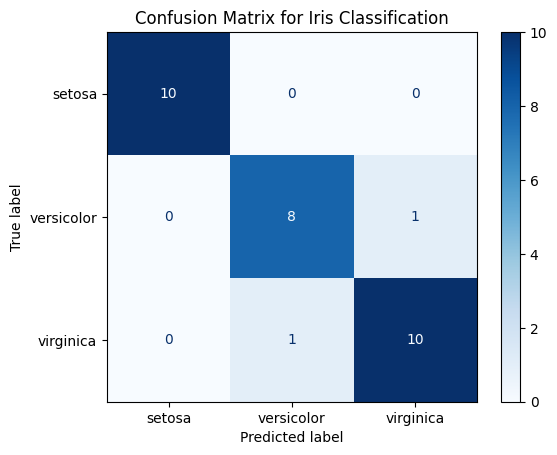

In [65]:
# Visualization: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Iris Classification')
plt.show()

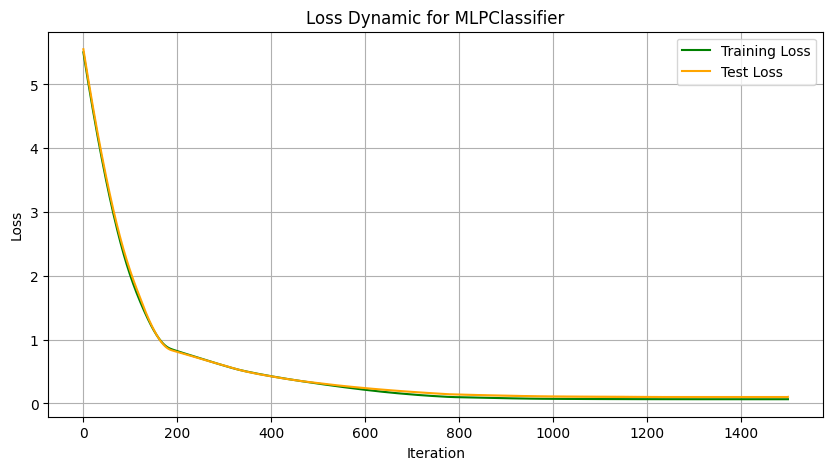

In [66]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss_curve_, label='Training Loss', color='green')
plt.plot(test_losses, label='Test Loss', color='orange')
plt.title('Loss Dynamic for MLPClassifier')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()